# Reading and Cleaning datasets

In [1]:
import os
import pandas as pd
from datetime import datetime

df1= pd.read_csv('Events_US.csv', skiprows=1)

In [2]:
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2678.6,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2177.2,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,39579.0,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2019.2,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1372.9,20


In [3]:
print(df1.isna())

      Name  Disaster  Begin Date  End Date  \
0    False     False       False     False   
1    False     False       False     False   
2    False     False       False     False   
3    False     False       False     False   
4    False     False       False     False   
..     ...       ...         ...       ...   
371  False     False       False     False   
372  False     False       False     False   
373  False     False       False     False   
374  False     False       False     False   
375  False     False       False     False   

     Total CPI-Adjusted Cost (Millions of Dollars)  Deaths  
0                                            False   False  
1                                            False   False  
2                                            False   False  
3                                            False   False  
4                                            False   False  
..                                             ...     ...  
371                 

In [4]:
print(df1['Disaster'].unique())

['Flooding' 'Tropical Cyclone' 'Drought' 'Freeze' 'Severe Storm'
 'Winter Storm' 'Wildfire']


In [5]:
print(df1['Begin Date'].unique())

[19800410 19800807 19800601 19810112 19810505 19820108 19820402 19820531
 19821201 19821213 19830817 19830601 19830929 19831215 19840327 19840613
 19850119 19850120 19850531 19850830 19850926 19851027 19851103 19860214
 19860601 19860910 19880601 19890501 19890626 19890921 19890601 19891223
 19891221 19900511 19900711 19900601 19901218 19910326 19910818 19910301
 19911001 19920324 19920428 19920619 19920823 19920911 19921121 19921210
 19930311 19930708 19930627 19930601 19930901 19940117 19940208 19940425
 19940707 19941016 19940601 19950101 19950428 19950505 19950801 19950915
 19950701 19951004 19960101 19960207 19960301 19960905 19961019 19970101
 19970228 19970203 19980105 19971201 19980515 19980530 19980620 19980808
 19980827 19980601 19980920 19981016 19981220 19990101 19990113 19990503
 19990601 19990914 20000121 20000328 20000301 20001003 20010406 20010430
 20010605 20020427 20020801 20020925 20021109 20020901 20020301 20030404
 20030503 20030704 20030721 20030918 20030301 20030

In [6]:
df2= pd.read_csv('state_cost_data.csv', skiprows=1)

In [7]:
df2.head()

,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,AK,0.0,0.0,0.0,0.0,0.0,2292.8,0.0
1,AL,6780.6,134.7,148.7,13894.8,26457.6,716.4,2377.1
2,AR,6651.0,4597.8,291.0,10216.5,706.4,0.0,1135.5
3,AZ,1486.5,1879.5,0.0,5358.0,0.0,1327.8,0.0
4,CA,16199.3,18798.3,15131.0,3445.4,0.0,98106.3,0.0


In [8]:
print(df2.isna())

    state  drought  flooding  freeze  severe storm  tropical cyclone  \
0   False    False     False   False         False             False   
1   False    False     False   False         False             False   
2   False    False     False   False         False             False   
3   False    False     False   False         False             False   
4   False    False     False   False         False             False   
5   False    False     False   False         False             False   
6   False    False     False   False         False             False   
7   False    False     False   False         False             False   
8   False    False     False   False         False             False   
9   False    False     False   False         False             False   
10  False    False     False   False         False             False   
11  False    False     False   False         False             False   
12  False    False     False   False         False             F

In [9]:
df3= pd.read_csv('state_freq_data.csv', skiprows=1)

In [10]:
df3.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


In [11]:
print(df3.isna())

       year  state  drought  flooding  freeze  severe storm  tropical cyclone  \
0     False  False    False     False   False         False             False   
1     False  False    False     False   False         False             False   
2     False  False    False     False   False         False             False   
3     False  False    False     False   False         False             False   
4     False  False    False     False   False         False             False   
...     ...    ...      ...       ...     ...           ...               ...   
2425  False  False    False     False   False         False             False   
2426  False  False    False     False   False         False             False   
2427  False  False    False     False   False         False             False   
2428  False  False    False     False   False         False             False   
2429  False  False    False     False   False         False             False   

      wildfire  winter stor

In [12]:
df3['state'].head()

0    AK
1    AL
2    AR
3    AZ
4    CA
Name: state, dtype: object

# Wrangling Flooding Data 

In [13]:
state_by_flooding = df3.loc[:,['state','flooding']]

In [14]:
cost_per_flood = df2.loc[:,['state','flooding']]

In [15]:
df4= df3.groupby(by= 'state',as_index= False)['flooding'].sum()

In [16]:
df4.head()

,state,flooding
0,AK,0
1,AL,2
2,AR,9
3,AZ,3
4,CA,6


In [17]:
df4.columns

Index(['state', 'flooding'], dtype='object')

In [18]:
df4['flooding']

0      0
1      2
2      9
3      3
4      6
5      2
6      3
7      0
8      2
9      4
10     4
11     0
12     0
13     7
14     3
15     7
16     6
17     6
18     4
19    10
20     4
21     5
22     2
23     4
24     5
25     9
26     5
27     4
28     2
29     4
30     5
31     2
32     4
33     0
34     1
35     5
36     5
37     6
38     3
39     5
40     0
41     2
42     3
43     4
44     4
45     9
46     1
47     5
48     0
49     1
50     3
51     4
52     2
53     0
Name: flooding, dtype: int64

In [19]:
df4['state']

0     AK
1     AL
2     AR
3     AZ
4     CA
5     CO
6     CT
7     DC
8     DE
9     FL
10    GA
11    GU
12    HI
13    IA
14    ID
15    IL
16    IN
17    KS
18    KY
19    LA
20    MA
21    MD
22    ME
23    MI
24    MN
25    MO
26    MS
27    MT
28    NC
29    ND
30    NE
31    NH
32    NJ
33    NM
34    NV
35    NY
36    OH
37    OK
38    OR
39    PA
40    PR
41    RI
42    SC
43    SD
44    TN
45    TX
46    UT
47    VA
48    VI
49    VT
50    WA
51    WI
52    WV
53    WY
Name: state, dtype: object

In [20]:
flooding_cost_per_state= pd.merge(df4, cost_per_flood, left_on = 'state', right_on='state')

In [21]:
flooding_cost_per_state.head()

,state,flooding_x,flooding_y
0,AK,0,0.0
1,AL,2,134.7
2,AR,9,4597.8
3,AZ,3,1879.5
4,CA,6,18798.3


In [22]:
flooding_cost_per_state.rename(columns={'flooding_x': 'Total number of Floods', 'flooding_y': 'State Flooding Cost(Millions)'}, inplace= True)

In [23]:
flooding_cost_per_state.head()

,state,Total number of Floods,State Flooding Cost(Millions)
0,AK,0,0.0
1,AL,2,134.7
2,AR,9,4597.8
3,AZ,3,1879.5
4,CA,6,18798.3


In [24]:
flooding_cost_per_state.index = flooding_cost_per_state.index + 1


In [25]:
flooding_cost_per_state.head()

,state,Total number of Floods,State Flooding Cost(Millions)
1,AK,0,0.0
2,AL,2,134.7
3,AR,9,4597.8
4,AZ,3,1879.5
5,CA,6,18798.3


In [26]:
print(flooding_cost_per_state['State Flooding Cost(Millions)'].mean())

3652.8333333333335


In [27]:
print(flooding_cost_per_state['State Flooding Cost(Millions)'].max())

23957.3


In [28]:
print(flooding_cost_per_state.min())

state                             AK
Total number of Floods             0
State Flooding Cost(Millions)    0.0
dtype: object


In [29]:
print(flooding_cost_per_state['State Flooding Cost(Millions)'].std())

5516.120862509388


# Wrangling Drought Data

In [30]:
df_drought= df3.groupby(by= 'state',as_index= False)['drought'].sum()

In [31]:
state_by_drought = df3.loc[:,['state','drought']]

In [32]:
cost_per_drought = df2.loc[:,['state','drought']]

In [33]:
drought_cost_per_state= pd.merge(df_drought, cost_per_drought, left_on = 'state', right_on='state')
drought_cost_per_state.index = drought_cost_per_state.index + 1

In [34]:
drought_cost_per_state.head()

,state,drought_x,drought_y
1,AK,0,0.0
2,AL,16,6780.6
3,AR,16,6651.0
4,AZ,15,1486.5
5,CA,14,16199.3


In [35]:
drought_cost_per_state.rename(columns={'drought_x': 'Total number of Droughts', 'drought_y': 'State Droughts Cost(Millions)'}, inplace= True)
#drought_cost_per_state.index = drought_cost_per_state.index + 1

In [36]:
drought_cost_per_state.head()

,state,Total number of Droughts,State Droughts Cost(Millions)
1,AK,0,0.0
2,AL,16,6780.6
3,AR,16,6651.0
4,AZ,15,1486.5
5,CA,14,16199.3


In [37]:
print(drought_cost_per_state['State Droughts Cost(Millions)'].mean())

6563.364814814816


In [38]:
print(drought_cost_per_state['State Droughts Cost(Millions)'].max())

41863.9


In [39]:
print(drought_cost_per_state['State Droughts Cost(Millions)'].min())

0.0


In [40]:
print(drought_cost_per_state['State Droughts Cost(Millions)'].std())

7966.291086755952


# Wrangling Freeze Data

In [41]:
df_freeze= df3.groupby(by= 'state',as_index= False)['freeze'].sum()

In [42]:
cost_per_freeze = df2.loc[:,['state','freeze']]

In [43]:
freeze_cost_per_state= pd.merge(df_freeze, cost_per_freeze, left_on = 'state', right_on='state')

In [44]:
freeze_cost_per_state.rename(columns={'freeze_x': 'Total number of Freeze', 'freeze_y': 'State Freeze Cost(Millions)'}, inplace= True)
freeze_cost_per_state.index = freeze_cost_per_state.index + 1


freeze_cost_per_state.head()

,state,Total number of Freeze,State Freeze Cost(Millions)
1,AK,0,0.0
2,AL,3,148.7
3,AR,2,291.0
4,AZ,0,0.0
5,CA,3,15131.0


In [45]:
print(freeze_cost_per_state['State Freeze Cost(Millions)'].mean())

675.2055555555556


In [46]:
print(freeze_cost_per_state['State Freeze Cost(Millions)'].max())

15131.0


In [47]:
print(freeze_cost_per_state['State Freeze Cost(Millions)'].std())

2723.8189029387195


# Wrangling Severe Storm Data

In [48]:
df_severe_storm= df3.groupby(by= 'state',as_index= False)['severe storm'].sum()

In [49]:
cost_per_severe_storm = df2.loc[:,['state','severe storm']]

In [50]:
severe_storm_cost_per_state= pd.merge(df_severe_storm, cost_per_severe_storm, left_on = 'state', right_on='state')

In [51]:
severe_storm_cost_per_state.rename(columns={'severe storm_x': 'Total number of Severe Stormes', 'severe storm_y': 'State Severe Storm Cost(Millions)'}, inplace= True)
severe_storm_cost_per_state.index = severe_storm_cost_per_state.index + 1



severe_storm_cost_per_state.head()

,state,Total number of Severe Stormes,State Severe Storm Cost(Millions)
1,AK,0,0.0
2,AL,54,13894.8
3,AR,51,10216.5
4,AZ,1,5358.0
5,CA,4,3445.4


In [52]:
print(severe_storm_cost_per_state['State Severe Storm Cost(Millions)'].mean())

8482.072222222221


In [53]:
print(severe_storm_cost_per_state['State Severe Storm Cost(Millions)'].max())

82717.0


In [54]:
print(severe_storm_cost_per_state['State Severe Storm Cost(Millions)'].std())

13280.375623842341


# Wrangling Tropical Cyclone Data

In [55]:
df_tropical_cyclone= df3.groupby(by= 'state',as_index= False)['tropical cyclone'].sum()

In [56]:
cost_per_tropical_cyclone = df2.loc[:,['state','tropical cyclone']]

In [57]:
tropical_cyclone_cost_per_state= pd.merge(df_tropical_cyclone, cost_per_tropical_cyclone, left_on = 'state', right_on='state')

In [58]:
tropical_cyclone_cost_per_state.rename(columns={'tropical cyclone_x': 'Total number of Tropical cyclones', 'tropical cyclone_y': 'State Tropical cyclone Cost(Millions)'}, inplace= True)
tropical_cyclone_cost_per_state.index = tropical_cyclone_cost_per_state.index + 1

tropical_cyclone_cost_per_state.head()

,state,Total number of Tropical cyclones,State Tropical cyclone Cost(Millions)
1,AK,0,0.0
2,AL,24,26457.6
3,AR,5,706.4
4,AZ,0,0.0
5,CA,0,0.0


In [59]:
print(tropical_cyclone_cost_per_state['State Tropical cyclone Cost(Millions)'].mean())

25674.961111111115


In [60]:
print(tropical_cyclone_cost_per_state['State Tropical cyclone Cost(Millions)'].max())

363258.2


In [61]:
print(tropical_cyclone_cost_per_state['State Tropical cyclone Cost(Millions)'].std())

69298.3291544021


# Wrangling Wildfire Data

In [62]:
df_wildfire= df3.groupby(by= 'state',as_index= False)['wildfire'].sum()

In [63]:
cost_per_wildfire = df2.loc[:,['state','wildfire']]

In [64]:
wildfire_cost_per_state= pd.merge(df_wildfire, cost_per_wildfire, left_on = 'state', right_on='state')

In [65]:
wildfire_cost_per_state.rename(columns={'wildfire_x': 'Total number of wildfires', 'wildfire_y': 'State wildfire Cost (Millions)'}, inplace= True)
wildfire_cost_per_state.index = wildfire_cost_per_state.index + 1

wildfire_cost_per_state.head()

,state,Total number of wildfires,State wildfire Cost (Millions)
1,AK,8,2292.8
2,AL,2,716.4
3,AR,0,0.0
4,AZ,14,1327.8
5,CA,19,98106.3


In [66]:
print(wildfire_cost_per_state['State wildfire Cost (Millions)'].mean())

2654.279629629629


In [67]:
print(wildfire_cost_per_state['State wildfire Cost (Millions)'].max())

98106.3


In [68]:
print(wildfire_cost_per_state['State wildfire Cost (Millions)'].std())

13334.675160002382


# Wrangling Winter Storm Data 

In [69]:
df_winter_storm= df3.groupby(by= 'state',as_index= False)['winter storm'].sum()

In [70]:
cost_per_winter_storm = df2.loc[:,['state','winter storm']]

In [71]:
winter_storm_cost_per_state= pd.merge(df_winter_storm, cost_per_winter_storm, left_on = 'state', right_on='state')

In [72]:
winter_storm_cost_per_state.rename(columns={'winter storm_x': 'Total number of Winter Stormes', 'winter storm_y': 'State Winter Storm Cost(Millions)'}, inplace= True)
winter_storm_cost_per_state.index = winter_storm_cost_per_state.index + 1

winter_storm_cost_per_state.head()

,state,Total number of Winter Stormes,State Winter Storm Cost(Millions)
1,AK,0,0.0
2,AL,9,2377.1
3,AR,8,1135.5
4,AZ,0,0.0
5,CA,0,0.0


In [73]:
print(winter_storm_cost_per_state['State Winter Storm Cost(Millions)'].mean())

1823.8481481481485


In [74]:
print(winter_storm_cost_per_state['State Winter Storm Cost(Millions)'].max())

25374.3


# Deaths Per Event 

In [75]:
df_deaths_per_event= df1.groupby(by= 'Disaster',as_index= False)['Deaths'].sum()
df_deaths_per_event.index = df_deaths_per_event.index + 1

In [76]:
df_deaths_per_event.head()

,Disaster,Deaths
1,Drought,4522
2,Flooding,738
3,Freeze,162
4,Severe Storm,2094
5,Tropical Cyclone,6897


## Various wrangling 

In [77]:
pd.to_datetime(df1['Begin Date'], format='%Y%m%d')

0     1980-04-10
1     1980-08-07
2     1980-06-01
3     1981-01-12
4     1981-05-05
         ...    
371   2023-08-11
372   2023-08-29
373   2023-09-23
374   2023-04-01
375   2023-12-16
Name: Begin Date, Length: 376, dtype: datetime64[ns]

In [78]:
pd.to_datetime(df1['End Date'], format='%Y%m%d')

0     1980-04-17
1     1980-08-11
2     1980-11-30
3     1981-01-14
4     1981-05-10
         ...    
371   2023-08-11
372   2023-08-31
373   2023-09-24
374   2023-09-30
375   2023-12-18
Name: End Date, Length: 376, dtype: datetime64[ns]

In [79]:
df_cost_per_event= df1.groupby(by= 'Disaster',as_index= False)['Total CPI-Adjusted Cost (Millions of Dollars)'].sum()
df_cost_per_event.index = df_cost_per_event.index + 1

In [80]:
df_cost_per_event.head()

,Disaster,Total CPI-Adjusted Cost (Millions of Dollars)
1,Drought,352383.7
2,Flooding,196399.1
3,Freeze,36328.5
4,Severe Storm,454745.8
5,Tropical Cyclone,1379161.2


In [81]:
df_year_WSto= df3.groupby(by= 'year',as_index= False)['winter storm'].sum()
df_year_WSto.index = df_year_WSto.index + 1

In [82]:
df_year_WSto.head()

,year,winter storm
1,1980,0
2,1981,0
3,1982,35
4,1983,0
5,1984,0


In [83]:
df_year_Flo= df3.groupby(by= 'year',as_index= False)['flooding'].sum()
df_year_Flo.index = df_year_Flo.index + 1

In [84]:
df_year_Flo.head()

,year,flooding
1,1980,3
2,1981,0
3,1982,0
4,1983,13
5,1984,0


In [85]:
df_year_Dro= df3.groupby(by= 'year',as_index= False)['drought'].sum()
df_year_Dro.index = df_year_Dro.index + 1

In [86]:
df_year_Dro.head()

,year,drought
1,1980,21
2,1981,0
3,1982,0
4,1983,11
5,1984,0


In [87]:
df_year_Fre= df3.groupby(by= 'year',as_index= False)['freeze'].sum()
df_year_Fre.index = df_year_Fre.index + 1

In [88]:
df_year_SeSto= df3.groupby(by= 'year',as_index= False)['severe storm'].sum()
df_year_SeSto.index = df_year_SeSto.index + 1

In [89]:
df_year_TropCy= df3.groupby(by= 'year',as_index= False)['tropical cyclone'].sum()
df_year_TropCy.index = df_year_TropCy.index + 1

In [90]:
df_year_WFire= df3.groupby(by= 'year',as_index= False)['wildfire'].sum()
df_year_WFire.index = df_year_WFire.index + 1

In [91]:
df_year_WFire.head()

,year,wildfire
1,1980,0
2,1981,0
3,1982,0
4,1983,0
5,1984,0


In [92]:
Total_disasters_by_Year= df3.groupby(by= 'year',as_index= False)['flooding', 'drought', 'freeze', 'severe storm', 'tropical cyclone', 'wildfire', 'winter storm'].sum()
Total_disasters_by_Year.index = Total_disasters_by_Year.index + 1

C:\Users\esteg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [93]:
Total_disasters_by_Year.head()

,year,flooding,drought,freeze,severe storm,tropical cyclone,wildfire,winter storm
1,1980,3,21,0,0,2,0,0
2,1981,0,0,1,5,0,0,0
3,1982,0,0,0,33,0,0,35
4,1983,13,11,41,0,1,0,0
5,1984,0,0,0,17,0,0,0


In [94]:
df1['Begin Date']= pd.to_datetime(df1['Begin Date'], format='%Y%m%d')
df1['End Date']= pd.to_datetime(df1['End Date'], format='%Y%m%d')

In [95]:
dt = datetime.strptime('1980-04-10', '%Y-%m-%d')
print(dt.year, dt.month, dt.day)

1980 4 10


In [96]:
#df1["Year_only"]= datetime.strptime(df1["Begin Date"], '%Y-%m-%d').year

In [97]:
#df1["Begin Date"]astype(str).str(3)

In [98]:
df1['year_only']=df1['Begin Date'].astype(str).str[:4]

In [99]:
df1.head(2)

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980


In [100]:
df_deaths_per_year= df1.groupby(by= ['Begin Date', 'End Date', 'Name'],as_index= False)['Deaths'].sum()
df_deaths_per_year.index = df_deaths_per_year.index + 1

df_deaths_per_year.head()

,Begin Date,End Date,Name,Deaths
1,1980-04-10,1980-04-17,Southern Severe Storms and Flooding (April 1980),7
2,1980-06-01,1980-11-30,Central/Eastern Drought/Heat Wave (Summer-Fall...,1260
3,1980-08-07,1980-08-11,Hurricane Allen (August 1980),13
4,1981-01-12,1981-01-14,Florida Freeze (January 1981),0
5,1981-05-05,1981-05-10,"Severe Storms, Flash Floods, Hail, Tornadoes (...",20


In [101]:
df5= pd.read_csv('US_inflation_rates.csv')
df5.rename(columns={'value': 'Inflation rate value'},inplace=True)
df5.index = df5.index + 1

In [102]:
df5.head()

,date,Inflation rate value
1,1947-01-01,21.48
2,1947-02-01,21.62
3,1947-03-01,22.00
4,1947-04-01,22.00
5,1947-05-01,21.95


In [103]:
df5['year_only']=df5['date'].astype(str).str[:4]

In [104]:
df5.head()

,date,Inflation rate value,year_only
1,1947-01-01,21.48,1947
2,1947-02-01,21.62,1947
3,1947-03-01,22.00,1947
4,1947-04-01,22.00,1947
5,1947-05-01,21.95,1947


In [105]:
#plt.bar(df_cost_per_event.Disaster, df_cost_per_event.Total CPI-Adjusted Cost (Millions of Dollars))
#plt.xlabel('Disaster Type')
#plt.ylabel('Cost in Millions')
#plt.show()

<AxesSubplot:title={'center':'cost per event'}, xlabel='Disaster'>

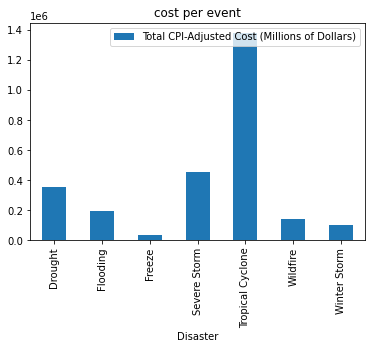

In [106]:
df_cost_per_event.plot(x= "Disaster", y = "Total CPI-Adjusted Cost (Millions of Dollars)", title= "cost per event", kind= "bar")

<AxesSubplot:xlabel='year'>

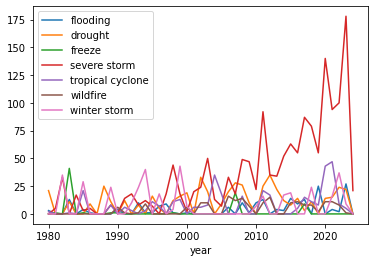

In [107]:
Total_disasters_by_Year.plot(x= "year", kind= "line", )

<AxesSubplot:xlabel='year'>

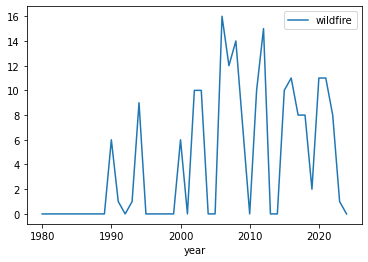

In [108]:
df_year_WFire.plot(x= "year", y= "wildfire", kind= "line")

<AxesSubplot:xlabel='year'>

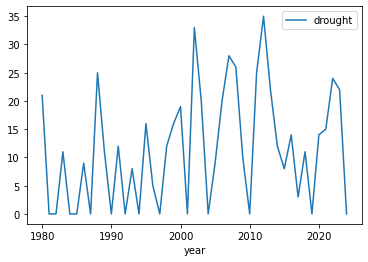

In [109]:
df_year_Dro.plot(x= "year", y= "drought", kind= "line")

<AxesSubplot:xlabel='year'>

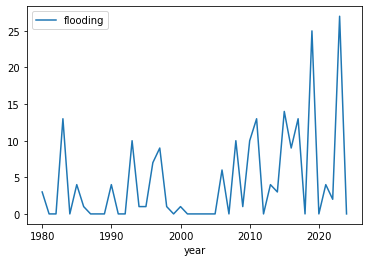

In [110]:
df_year_Flo.plot(x= "year", y= "flooding", kind= "line")

<AxesSubplot:xlabel='year'>

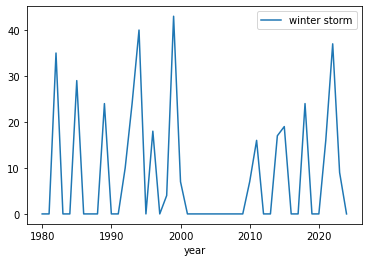

In [111]:
df_year_WSto.plot(x= "year", y= "winter storm", kind= "line")

<AxesSubplot:xlabel='year'>

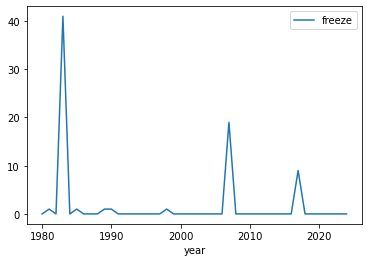

In [112]:
df_year_Fre.plot(x= "year", y= "freeze", kind= "line")

<AxesSubplot:xlabel='year'>

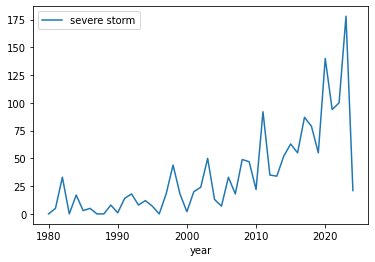

In [113]:
df_year_SeSto.plot(x= "year", y= "severe storm", kind= "line")

<AxesSubplot:xlabel='year'>

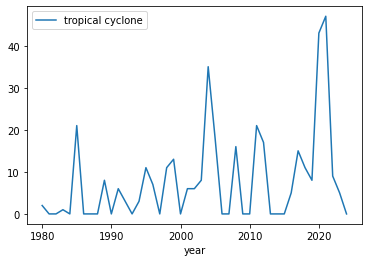

In [114]:
df_year_TropCy.plot(x= "year", y= "tropical cyclone", kind= "line")

In [115]:
df_deaths_per_year2= df1.groupby(by= ['year_only'],as_index= False)['Deaths'].sum()
df_deaths_per_year2.index = df_deaths_per_year2.index + 1

df_deaths_per_year2.head()

,year_only,Deaths
1,1980,1280
2,1981,20
3,1982,243
4,1983,186
5,1984,81


In [116]:
print(df_deaths_per_year2['Deaths'].mean())

380.2325581395349


In [117]:
print(df_deaths_per_year2['Deaths'].max())

3280


In [118]:
inflation_rate_per_year= df5.groupby(by= ['year_only'],as_index= False)['Inflation rate value'].mean()
inflation_rate_per_year.index = inflation_rate_per_year.index + 1

inflation_rate_per_year.head()

,year_only,Inflation rate value
1,1947,22.331667
2,1948,24.045000
3,1949,23.809167
4,1950,24.062500
5,1951,25.973333


<AxesSubplot:title={'center':'Average inflation rate per year'}, xlabel='year_only'>

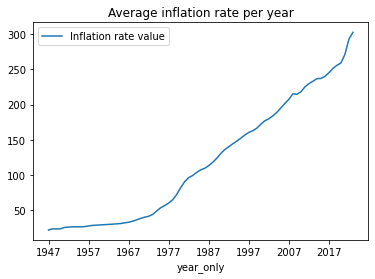

In [119]:
inflation_rate_per_year.plot(x= "year_only", y = "Inflation rate value", title= "Average inflation rate per year", kind= "line")